In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
# Spotify API credentials
client_id = "91924ddd17664918b13c9a03215e995b"
client_secret = "dcbdd3d0af7d47b68db10e4a438e0832"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [2]:
# Define the artist name(s) you want to search for
name = ["S. P. Balasubrahmanyam"]
# Search for the artist
artist = sp.search(name) 

In [3]:
# Get the URI of the first artist found
artists_uris = artist['tracks']['items'][0]['artists'][0]['uri']

# Get the albums of the artist
artist_albums = sp.artist_albums(artists_uris, album_type='album')

# Initialize empty lists to store album names and URIs
artist_album_names = []
artist_album_uris = []

# Extract album names and URIs
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])

In [4]:
# Function to retrieve songs from an album URI
def album_songs(uri):
    album = uri 
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album) 
    for n in range(len(tracks['items'])): 
        spotify_albums[album]['album'].append(artist_album_names[album_count]) 
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [5]:
# Dictionary to store album data
spotify_albums = {}
album_count = 0

# Loop through each album URI and retrieve songs
for i in artist_album_uris: #each album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1

Bhalobasa Bhalobasa (Original Motion Picture Soundtrack) album songs has been added to spotify_albums dictionary
Banshadhar (Original Motion Picture Soundtrack) album songs has been added to spotify_albums dictionary
Alka Yagnik Love Songs album songs has been added to spotify_albums dictionary
Agnipariksha (Original Motion Picture Soundtrack) album songs has been added to spotify_albums dictionary
Prem - Jhankar Beats album songs has been added to spotify_albums dictionary
Bengali Ever Green Alka Yagnik album songs has been added to spotify_albums dictionary
Ankhon Mein Tum Ho - Jhankar Beats album songs has been added to spotify_albums dictionary
Kumar Sanu & Alka Yagnik Duet Hits album songs has been added to spotify_albums dictionary
Damini - Jhankar Beats album songs has been added to spotify_albums dictionary
51 SHAKTI PEETH - Pt. 03 album songs has been added to spotify_albums dictionary
51 Shakti peeth - pt. 02 album songs has been added to spotify_albums dictionary
51 SHAKTI P

In [6]:
# Function to retrieve audio features for tracks in an album
def audio_features(album):
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        features = sp.audio_features(track)
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [7]:
# Import necessary libraries
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 14.722975969314575 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 28.83991026878357 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 40.720136642456055 seconds
20 playlists completed
Loop #: 20
Elapsed Time: 54.0083692073822 seconds


In [8]:
# Dictionary to store data for creating a DataFrame
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []

# Populate the DataFrame dictionary
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

# Calculate the length of the DataFrame
len(dic_df['album'])

201

In [9]:
# Import pandas library and create a DataFrame
import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)
dataframe

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Bhalobasa Bhalobasa (Original Motion Picture S...,1,22rro1mbUtJ25tCUHG5rrQ,Bol Raja Chai Kemon Rani,spotify:track:22rro1mbUtJ25tCUHG5rrQ,0.00334,0.719,0.734,0.000074,0.0793,-7.609,0.0680,161.015,0.700,27
1,Bhalobasa Bhalobasa (Original Motion Picture S...,2,1NK8Wy1ShoE9i0P9K13hmY,Ektu Lajja Chokhe Ektu Lajja Mukhe,spotify:track:1NK8Wy1ShoE9i0P9K13hmY,0.19800,0.702,0.640,0.000008,0.1530,-7.951,0.0519,98.013,0.633,25
2,Bhalobasa Bhalobasa (Original Motion Picture S...,3,0kZ9SyaPvrVEEE2hKyG1oh,Halka Halka Ei Ektu Melamesha,spotify:track:0kZ9SyaPvrVEEE2hKyG1oh,0.10400,0.898,0.626,0.000009,0.0887,-9.533,0.1450,103.012,0.805,24
3,Bhalobasa Bhalobasa (Original Motion Picture S...,4,4p19mOIgJgFKeJ9o7B8i0W,Bolto Lokey Basle Bhalo,spotify:track:4p19mOIgJgFKeJ9o7B8i0W,0.15600,0.610,0.781,0.000000,0.0706,-7.477,0.1220,65.669,0.837,21
4,Bhalobasa Bhalobasa (Original Motion Picture S...,5,6NZhaNWaIEPbdGisdi7KmK,Bhenge Gelo Aaj Swapno Aamar,spotify:track:6NZhaNWaIEPbdGisdi7KmK,0.59300,0.367,0.474,0.000000,0.2380,-8.534,0.0568,81.508,0.296,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Bangla Hub with Alka Yagnik,6,3q03uzMAB5NM8YsWhd0pyU,"Bakam Bakam Bak Bakam (From ""Dalaal"")",spotify:track:3q03uzMAB5NM8YsWhd0pyU,0.54400,0.504,0.497,0.000000,0.5250,-11.335,0.0529,96.954,0.967,17
197,Bangla Hub with Alka Yagnik,7,2j3ODGFimCoR9mRDsjZh7A,"Gyan Bhikari Jadi Hotam Ami (From ""Anutap"")",spotify:track:2j3ODGFimCoR9mRDsjZh7A,0.76600,0.479,0.661,0.000000,0.3310,-8.749,0.0696,138.301,0.564,17
198,Bangla Hub with Alka Yagnik,8,1WoAAQnzz8ToFECA3xTm26,"Khushi Khushi Shobay Khushi (From ""Tok Misti J...",spotify:track:1WoAAQnzz8ToFECA3xTm26,0.39100,0.652,0.579,0.000000,0.5000,-9.472,0.0747,111.631,0.862,16
199,Bangla Hub with Alka Yagnik,9,2MBkehOtqdrEtgcAoln2FN,"Dudh Shada Kapore (From ""Samadhi"")",spotify:track:2MBkehOtqdrEtgcAoln2FN,0.66400,0.677,0.667,0.000013,0.3140,-5.841,0.0405,90.047,0.640,13


In [10]:
# Summary statistics
print(dataframe.describe())

# Data info
print(dataframe.info())


       track_number  acousticness  danceability      energy  instrumentalness  \
count    201.000000    201.000000    201.000000  201.000000        201.000000   
mean       6.452736      0.401617      0.571816    0.658930          0.048587   
std        4.505442      0.263455      0.140922    0.137143          0.161790   
min        1.000000      0.003340      0.224000    0.180000          0.000000   
25%        3.000000      0.184000      0.491000    0.576000          0.000000   
50%        6.000000      0.347000      0.570000    0.658000          0.000022   
75%        9.000000      0.613000      0.667000    0.750000          0.000794   
max       23.000000      0.974000      0.898000    0.980000          0.959000   

         liveness    loudness  speechiness       tempo     valence  popularity  
count  201.000000  201.000000   201.000000  201.000000  201.000000  201.000000  
mean     0.205234   -9.936005     0.089083  118.061313    0.667129   14.308458  
std      0.184354    2.2142

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


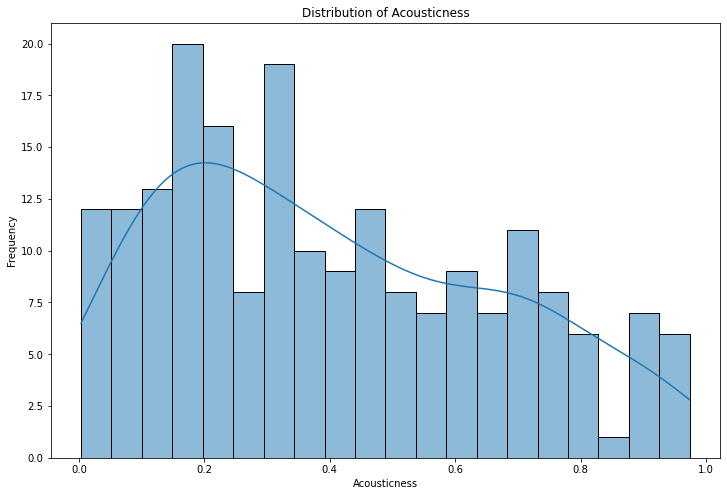

In [11]:
# Import matplotlib and seaborn for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
# Plot a histogram of the 'acousticness' feature
plt.figure(figsize=(12, 8))
sns.histplot(data=dataframe, x='acousticness', bins=20, kde=True)
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()

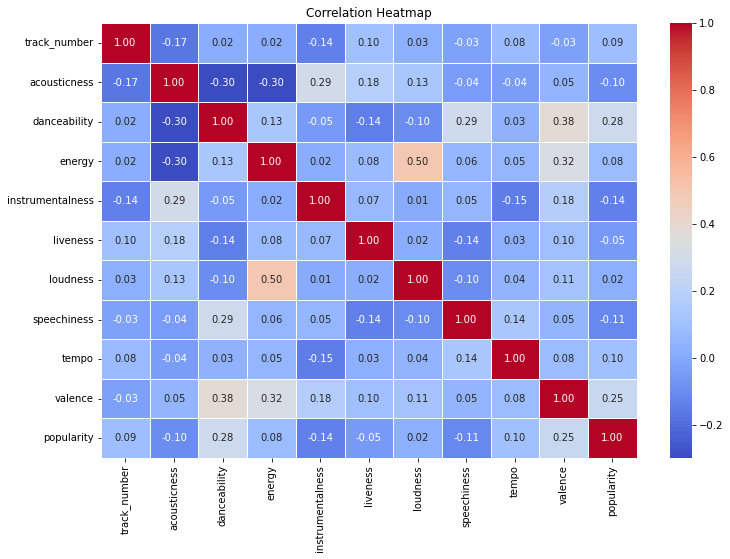

In [12]:
# Create a correlation matrix and plot a heatmap
correlation_matrix = dataframe.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

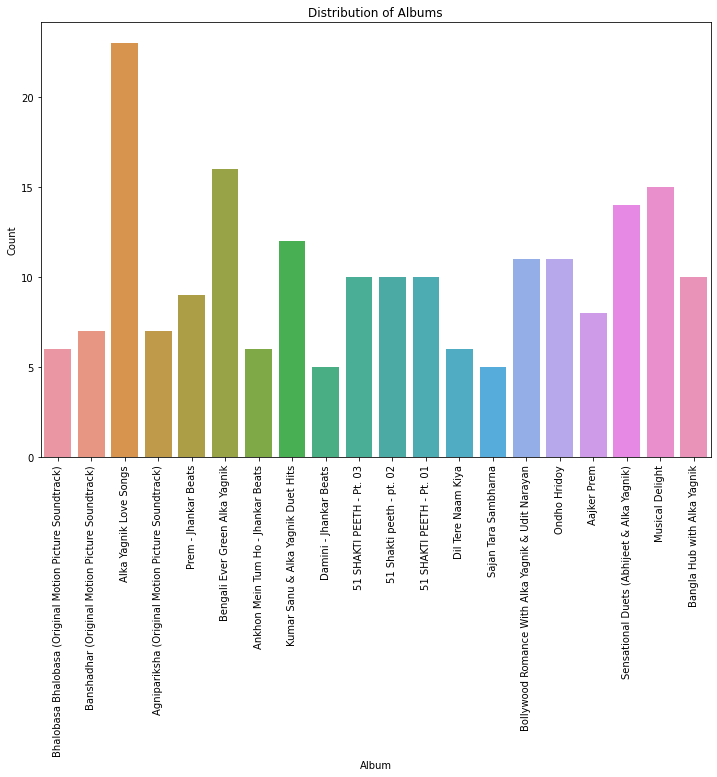

In [13]:
# Plot a countplot for the 'album' feature
plt.figure(figsize=(12, 8))
sns.countplot(data=dataframe, x='album')
plt.title('Distribution of Albums')
plt.xlabel('Album')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

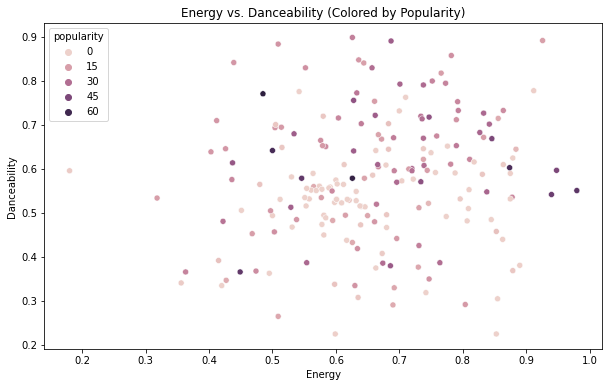

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='energy', y='danceability', hue='popularity')
plt.title('Energy vs. Danceability (Colored by Popularity)')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

In [15]:
correlation_matrix = dataframe.corr()
popularity_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(popularity_correlations)

popularity          1.000000
danceability        0.276687
valence             0.253788
tempo               0.100932
track_number        0.088976
energy              0.080682
loudness            0.022816
liveness           -0.052932
acousticness       -0.097423
speechiness        -0.113954
instrumentalness   -0.138453
Name: popularity, dtype: float64


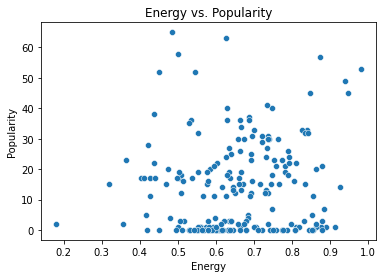

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=dataframe, x='energy', y='popularity')
plt.title('Energy vs. Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

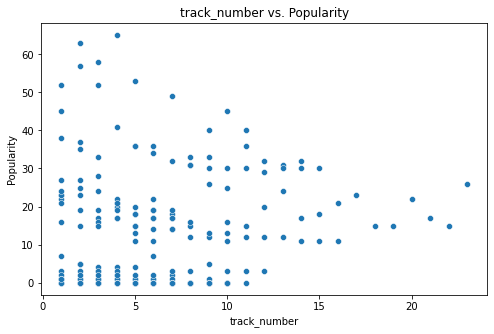

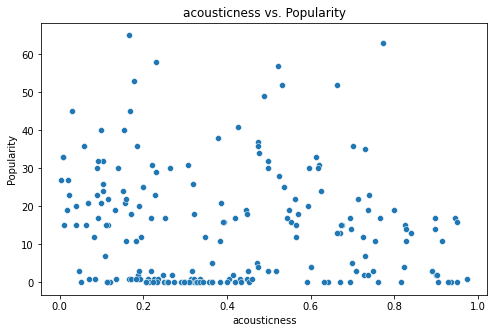

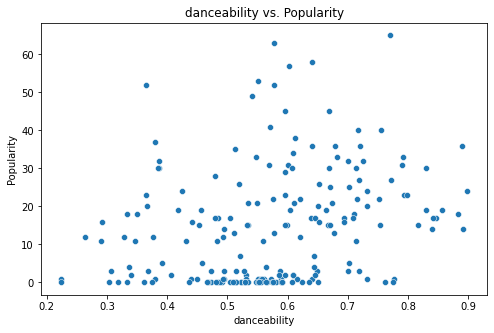

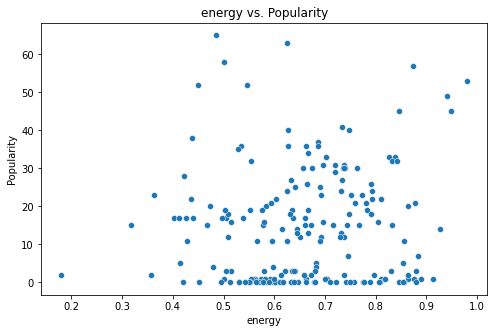

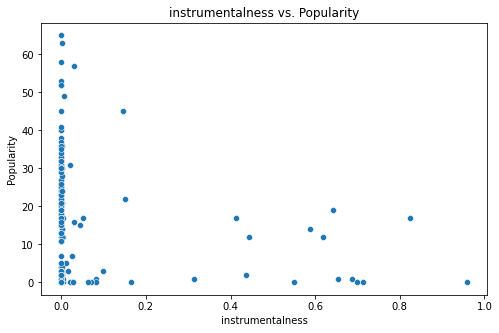

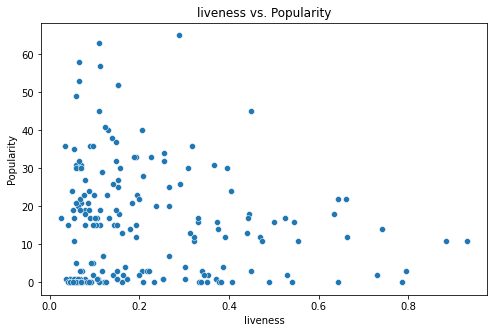

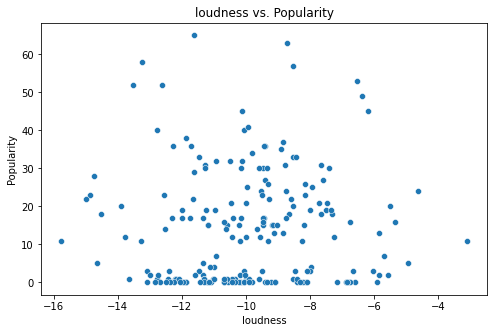

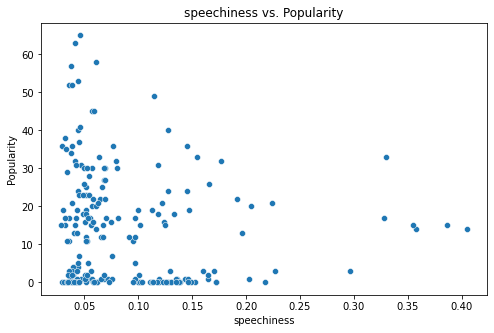

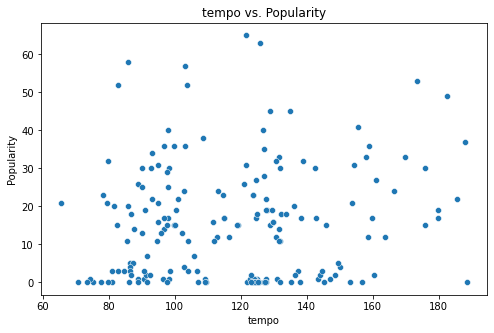

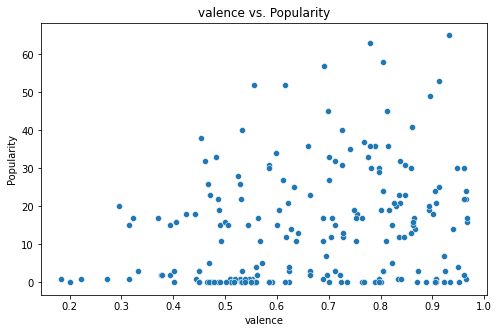

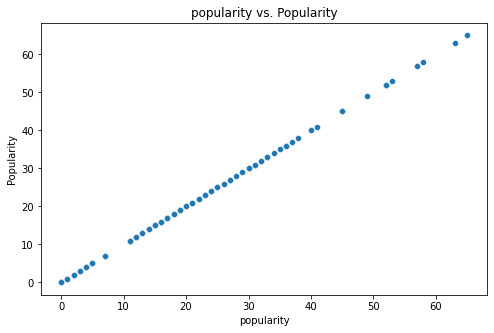

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numeric columns (excluding 'popularity' which is the target)
numeric_features = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create scatter plots for all numeric features vs. 'popularity'
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=dataframe, x=feature, y='popularity')
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()



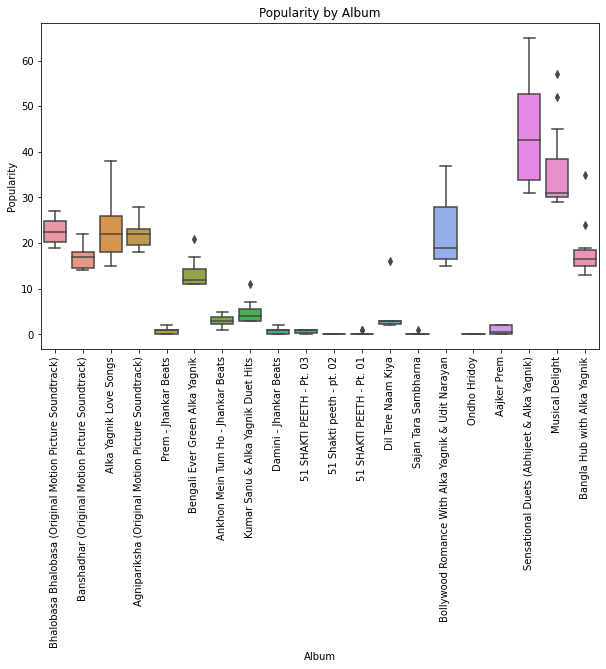

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe, x='album', y='popularity')
plt.title('Popularity by Album')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

C:\Users\17029\AppData\Local\Temp\ipykernel_10992\3371612692.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = dataframe.loc[~((dataframe < (Q1 - threshold * IQR)) | (dataframe > (Q3 + threshold * IQR))).any(axis=1)]


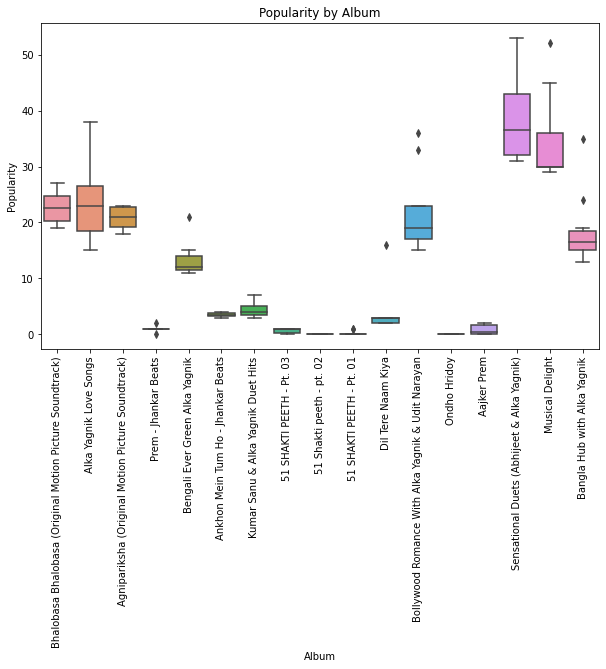

In [19]:
# Calculate the IQR (Interquartile Range)
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5
# Remove outliers
df_no_outliers = dataframe.loc[~((dataframe < (Q1 - threshold * IQR)) | (dataframe > (Q3 + threshold * IQR))).any(axis=1)]

# df_no_outliers now contains your dataset with outliers removed

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='album', y='popularity')
plt.title('Popularity by Album')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()


dataframe = df_no_outliers

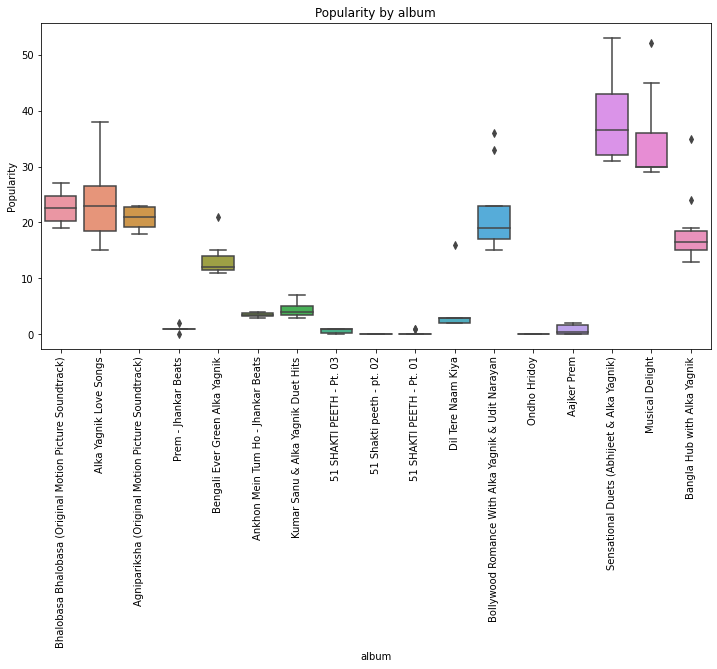

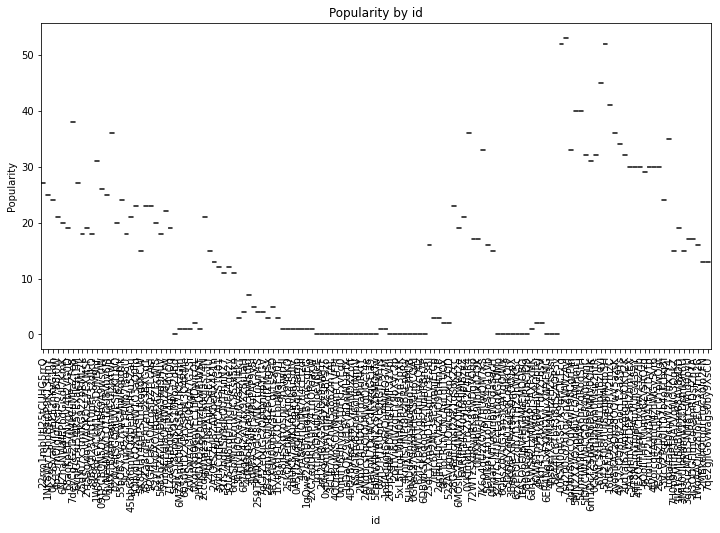

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\l

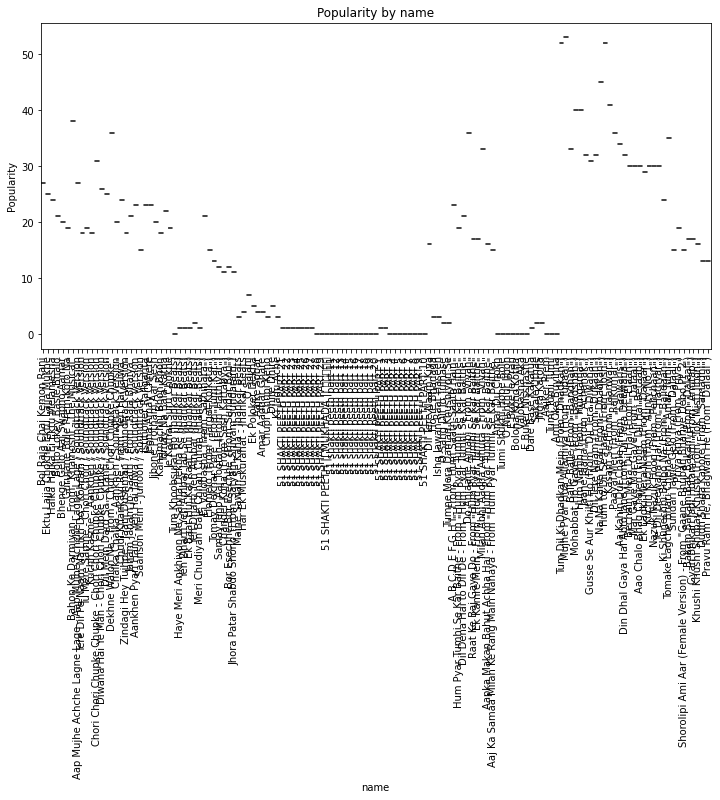

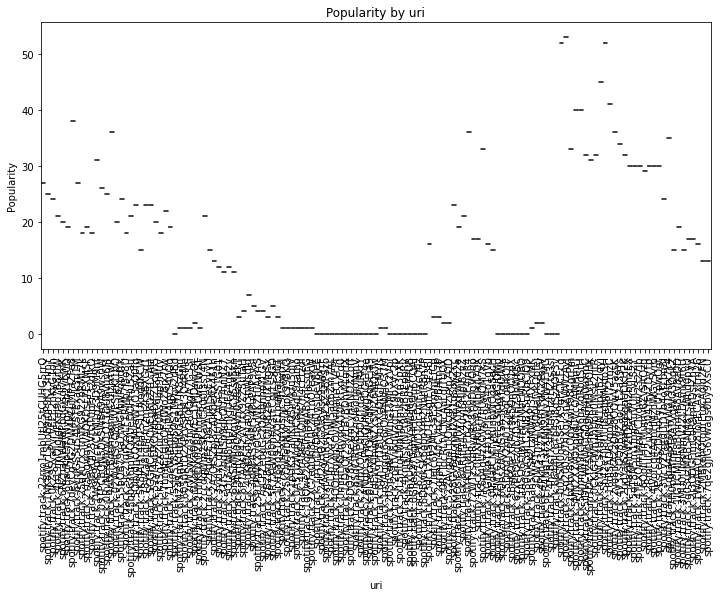

In [20]:
# Create box plots for all categorical features vs. 'popularity'
categorical_features = dataframe.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=dataframe, x=feature, y='popularity')
    plt.title(f'Popularity by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.xticks(rotation=90)
    plt.show()

In [21]:
dataframe

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Bhalobasa Bhalobasa (Original Motion Picture S...,1,22rro1mbUtJ25tCUHG5rrQ,Bol Raja Chai Kemon Rani,spotify:track:22rro1mbUtJ25tCUHG5rrQ,0.00334,0.719,0.734,0.000074,0.0793,-7.609,0.0680,161.015,0.700,27
1,Bhalobasa Bhalobasa (Original Motion Picture S...,2,1NK8Wy1ShoE9i0P9K13hmY,Ektu Lajja Chokhe Ektu Lajja Mukhe,spotify:track:1NK8Wy1ShoE9i0P9K13hmY,0.19800,0.702,0.640,0.000008,0.1530,-7.951,0.0519,98.013,0.633,25
2,Bhalobasa Bhalobasa (Original Motion Picture S...,3,0kZ9SyaPvrVEEE2hKyG1oh,Halka Halka Ei Ektu Melamesha,spotify:track:0kZ9SyaPvrVEEE2hKyG1oh,0.10400,0.898,0.626,0.000009,0.0887,-9.533,0.1450,103.012,0.805,24
3,Bhalobasa Bhalobasa (Original Motion Picture S...,4,4p19mOIgJgFKeJ9o7B8i0W,Bolto Lokey Basle Bhalo,spotify:track:4p19mOIgJgFKeJ9o7B8i0W,0.15600,0.610,0.781,0.000000,0.0706,-7.477,0.1220,65.669,0.837,21
4,Bhalobasa Bhalobasa (Original Motion Picture S...,5,6NZhaNWaIEPbdGisdi7KmK,Bhenge Gelo Aaj Swapno Aamar,spotify:track:6NZhaNWaIEPbdGisdi7KmK,0.59300,0.367,0.474,0.000000,0.2380,-8.534,0.0568,81.508,0.296,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Bangla Hub with Alka Yagnik,6,3q03uzMAB5NM8YsWhd0pyU,"Bakam Bakam Bak Bakam (From ""Dalaal"")",spotify:track:3q03uzMAB5NM8YsWhd0pyU,0.54400,0.504,0.497,0.000000,0.5250,-11.335,0.0529,96.954,0.967,17
197,Bangla Hub with Alka Yagnik,7,2j3ODGFimCoR9mRDsjZh7A,"Gyan Bhikari Jadi Hotam Ami (From ""Anutap"")",spotify:track:2j3ODGFimCoR9mRDsjZh7A,0.76600,0.479,0.661,0.000000,0.3310,-8.749,0.0696,138.301,0.564,17
198,Bangla Hub with Alka Yagnik,8,1WoAAQnzz8ToFECA3xTm26,"Khushi Khushi Shobay Khushi (From ""Tok Misti J...",spotify:track:1WoAAQnzz8ToFECA3xTm26,0.39100,0.652,0.579,0.000000,0.5000,-9.472,0.0747,111.631,0.862,16
199,Bangla Hub with Alka Yagnik,9,2MBkehOtqdrEtgcAoln2FN,"Dudh Shada Kapore (From ""Samadhi"")",spotify:track:2MBkehOtqdrEtgcAoln2FN,0.66400,0.677,0.667,0.000013,0.3140,-5.841,0.0405,90.047,0.640,13


In [22]:
df = dataframe
columns_to_remove = ['album', 'track_number', 'id','name','uri']
df.drop(columns=columns_to_remove, inplace=True)
df

C:\Users\17029\AppData\Local\Temp\ipykernel_10992\545954205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_remove, inplace=True)


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.00334,0.719,0.734,0.000074,0.0793,-7.609,0.0680,161.015,0.700,27
1,0.19800,0.702,0.640,0.000008,0.1530,-7.951,0.0519,98.013,0.633,25
2,0.10400,0.898,0.626,0.000009,0.0887,-9.533,0.1450,103.012,0.805,24
3,0.15600,0.610,0.781,0.000000,0.0706,-7.477,0.1220,65.669,0.837,21
4,0.59300,0.367,0.474,0.000000,0.2380,-8.534,0.0568,81.508,0.296,20
...,...,...,...,...,...,...,...,...,...,...
196,0.54400,0.504,0.497,0.000000,0.5250,-11.335,0.0529,96.954,0.967,17
197,0.76600,0.479,0.661,0.000000,0.3310,-8.749,0.0696,138.301,0.564,17
198,0.39100,0.652,0.579,0.000000,0.5000,-9.472,0.0747,111.631,0.862,16
199,0.66400,0.677,0.667,0.000013,0.3140,-5.841,0.0405,90.047,0.640,13


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'df' contains your dataset
# Extract features and target variable
X = df.drop(columns=['popularity'])  # Features
y = df['popularity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Assuming it's a regression task with a single output neuron
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_data=(X_test_normalized, y_test))





Epoch 1/10


4/4 [==============================] - 1s 62ms/step - loss: 400.9597 - mse: 400.9597 - val_loss: 393.0488 - val_mse: 393.0488
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 396.6511 - mse: 396.6511 - val_loss: 389.1618 - val_mse: 389.1618
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 392.6580 - mse: 392.6580 - val_loss: 385.1211 - val_mse: 385.1211
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 388.3812 - mse: 388.3812 - val_loss: 380.9409 - val_mse: 380.9409
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 383.7958 - mse: 383.7958 - val_loss: 376.4662 - val_mse: 376.4662
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 378.9284 - mse: 378.9284 - val_loss: 371.3515 - val_mse: 371.3515
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 373.2371 - mse: 373.2371 - val_loss: 365.5854 - val_mse: 365.5854
Epoch 8/10
4/4 [====================

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming your model is already trained and you have X_test_normalized and y_test
# Predict using the model
y_pred = model.predict(X_test_normalized)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


1/1 [==============================] - 0s 69ms/step
Mean Squared Error (MSE): 343.55195847801355
Mean Absolute Error (MAE): 13.5790413916111
R² Score: -0.8603211366363865


The MSE and MAE values give an idea of how close the predicted values are to the actual values. Lower values for these metrics are better, indicating less error between predictions and actual values.

The R² score, also known as the coefficient of determination, measures how well the predictions approximate the true values. An R² score closer to 1 indicates a better fit, while a negative R² suggests that the model performs worse than a simple horizontal line.

In this case, the R² score being negative indicates that the model's predictions are performing worse than a horizontal line, implying that the model might not fit the data well or it might not capture the relationship between the features and the target variable adequately.

Further analysis might involve refining the model architecture, exploring additional features, or trying different algorithms to improve its predictive performance on this dataset.

HYper parameter tuning below

In [25]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Define a function to create your neural network model
def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(neurons // 2, activation=activation),
        Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model

# Define the hyperparameters grid for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': [32, 64, 128]
}

# Perform grid search
best_score = float('inf')
best_params = {}
for optimizer in param_grid['optimizer']:
    for activation in param_grid['activation']:
        for neurons in param_grid['neurons']:
            model = create_model(optimizer=optimizer, activation=activation, neurons=neurons)
            model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, verbose=0)
            y_pred = model.predict(X_train_normalized)
            mse = mean_squared_error(y_train, y_pred)
            if mse < best_score:
                best_score = mse
                best_params = {'optimizer': optimizer, 'activation': activation, 'neurons': neurons}

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)


4/4 [==============================] - 0s 1ms/step
Best Parameters: {'optimizer': 'rmsprop', 'activation': 'tanh', 'neurons': 128}
Best Score (MSE): 202.08150812809393


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Create a new model with the best hyperparameters
best_model = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(1)
])
best_model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mse'])

# Train the model on the entire training set
best_model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model on the testing set
y_pred_test = best_model.predict(X_test_normalized)
mse_test = mean_squared_error(y_test, y_pred_test)

print("MSE on Testing Set:", mse_test)


1/1 [==============================] - 0s 43ms/step
MSE on Testing Set: 199.6564909608492


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for the optimized model on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error (MSE) on Testing Set: {mse_test}")
print(f"Mean Absolute Error (MAE) on Testing Set: {mae_test}")
print(f"R² Score on Testing Set: {r2_test}")


Mean Squared Error (MSE) on Testing Set: 199.6564909608492
Mean Absolute Error (MAE) on Testing Set: 11.712104286466326
R² Score on Testing Set: -0.08113250713687825


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataset is in 'df' and contains features and the 'popularity' column

# Separating features and target variable
X = df.drop(columns=['popularity'])
y = df['popularity']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing features using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_normalized, y_train)

# Predictions on the testing set
y_pred = linear_reg.predict(X_test_normalized)

# Calculate metrics for evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on Testing Set: {mse}")
print(f"Mean Absolute Error (MAE) on Testing Set: {mae}")
print(f"R² Score on Testing Set: {r2}")


Mean Squared Error (MSE) on Testing Set: 230.44900434379028
Mean Absolute Error (MAE) on Testing Set: 11.851079999438307
R² Score on Testing Set: -0.24787282714617342


The Linear Regression model's performance metrics on the testing set for predicting the 'popularity' score from your Spotify dataset are as follows:

Mean Squared Error (MSE): 230.449
Mean Absolute Error (MAE): 11.851
R² Score: -0.248
The MSE and MAE give insights into the magnitude of errors between predicted and actual values. Lower values indicate better performance. However, the R² score being negative suggests that the model might perform worse than a simple horizontal line, implying that it might not capture the relationship between features and the target variable well.

Improving the model could involve exploring more complex regression models, feature engineering, or using different sets of features to improve predictive performance. Additionally, considering the nature of the data and potential nonlinear relationships, more sophisticated algorithms or ensembles might be more suitable for this regression task.

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_normalized, y_train)

# Predictions on the testing set
y_pred_rf = random_forest_reg.predict(X_test_normalized)

# Calculate metrics for evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MSE on Testing Set: {mse_rf}")
print(f"Random Forest Regression - MAE on Testing Set: {mae_rf}")
print(f"Random Forest Regression - R² Score on Testing Set: {r2_rf}")


Random Forest Regression - MSE on Testing Set: 141.62885357142858
Random Forest Regression - MAE on Testing Set: 8.953214285714285
Random Forest Regression - R² Score on Testing Set: 0.23308500110509445


It looks like the Random Forest Regression model has shown improvements in performance metrics compared to the Linear Regression model:

Random Forest Regression MSE: 141.629
Random Forest Regression MAE: 8.953
Random Forest Regression R² Score: 0.233
The MSE and MAE have decreased, indicating reduced errors between predicted and actual values. Additionally, the R² score has increased, suggesting that the Random Forest model performs better than a simple horizontal line.

This improvement might indicate that the Random Forest Regression model better captures the complex relationships within the data compared to the Linear Regression model. You can further fine-tune hyperparameters or try other algorithms to see if you can achieve even better performance.

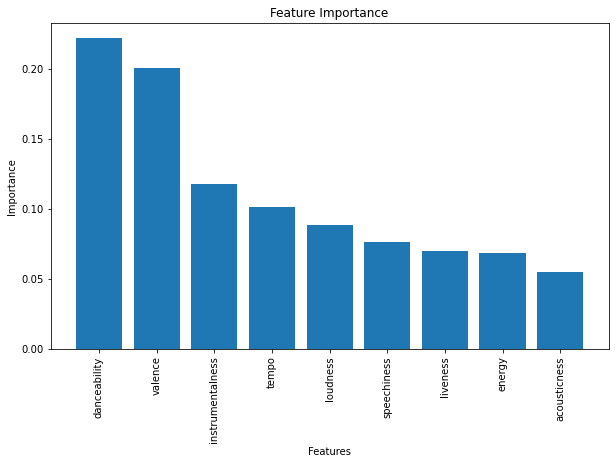

In [30]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = random_forest_reg.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names based on feature importance ranking
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


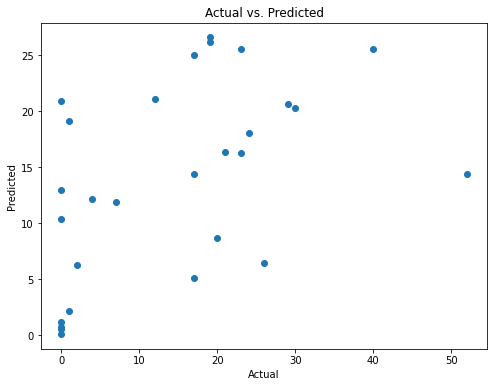

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


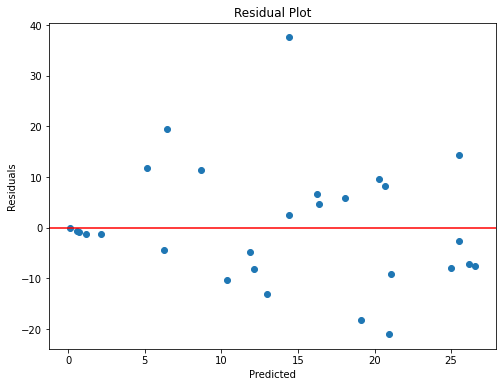

In [32]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
